In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
dataset = pd.read_csv('housing.csv', delim_whitespace=True, header = None)


In [26]:
dataset.drop(columns =[11, 12], inplace = True)

In [27]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'PRICE']
dataset.columns = column_names

In [28]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,36.2


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  PRICE    506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


In [30]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [31]:

##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [33]:
X_train=scaler.fit_transform(X_train)

C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

In [34]:
X_test=scaler.transform(X_test)

C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [35]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [36]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.51436915,
        -0.66777595, -0.74457062],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.6302741 ,
        -0.92035152, -0.30083661],
       [-0.4051199 , -0.50512499,  2.39678516, ..., -0.6302741 ,
         1.82791117,  0.8084984 ],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.16665429,
        -0.60162521, -0.38958342],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  1.68782492,
         1.5572945 ,  0.8528718 ],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  1.68782492,
         1.5572945 ,  0.8528718 ]])

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
regression=LinearRegression()

In [39]:
regression.fit(X_train,y_train)

C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LinearRegression()

In [40]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.51461649  0.57261901  0.05317954  1.2185105  -2.63222707  4.59542681
 -1.40612866 -3.14734454  1.50306379 -1.45396524 -2.23761466]


In [41]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

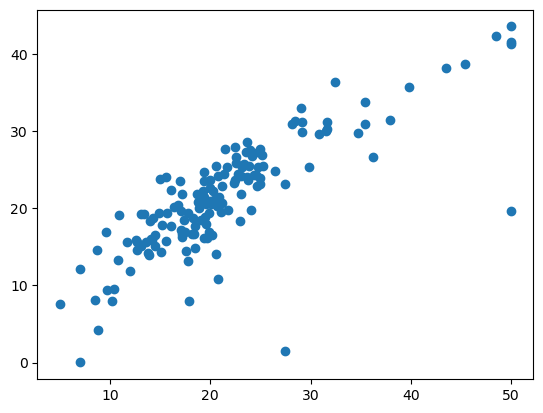

In [43]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [44]:

## Residuals
residuals=y_test-reg_pred

C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


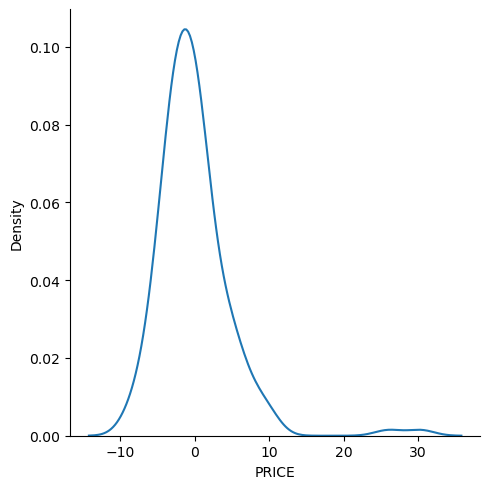

In [45]:

## Plot this residuals 

sns.displot(residuals,kind="kde")

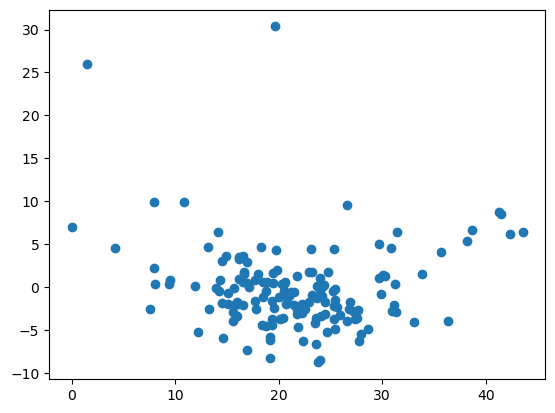

In [46]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.28901016000958
24.499246675632236
4.9496713704681685


C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

In [48]:

from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.67120884605689


C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sofiy\anaconda3\Anocondanew\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [49]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6453752553899313

In [52]:
import pickle

In [53]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [54]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))